## Importing Needed Libraries

In [12]:
import matplotlib as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

## Loading Data

In [13]:
oecd_bli = pd.read_csv("../data/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("../data/gdp_per_capita.csv", thousands=',', delimiter='\t',
    encoding='latin1', na_values='n/a')

## Preparing Data

In [14]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

## Visualizing Data

<AxesSubplot: xlabel='GDP per capita', ylabel='Life satisfaction'>

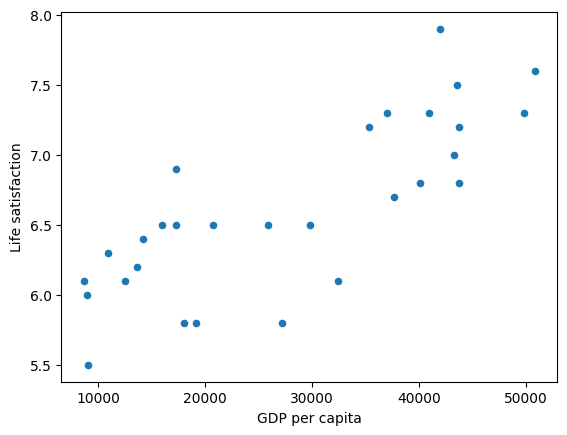

In [15]:
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")

That plot indicates that there might be a direct correlation between GDP per capita and Life satisfaction since the higher GPD goes the higher Life satisfaction increases.

## Training the model

In [16]:
# Selecting the model
model = sklearn.linear_model.LinearRegression()

# Training
model.fit(x, y)

LinearRegression()

## Using the model

In [17]:
x_new = [[50961]] # Predicting Australia GDP(50,961.865)
print(model.predict(x_new)) # Outputs 7.4, the "Oficial" Australia Life satisfaction is 7.2

[[7.43402471]]


## Using the model to figure out the "Perfect" GDP

In [18]:
def bruteforce_gdp(max_iterations=1000000):  
    for i in range(max_iterations):
        # Check if perfect Life satisfaction
        predicted_LS = model.predict([[i]])
        if (predicted_LS >= 10):
            print("Found the perfect GDP!\n" + 
                  "It is: " + str(i) + "!\nProducing the Life satisfaction of: " + str(predicted_LS))
            return
    
    print("Reached the maximum number of iterations without finding a solution")

bruteforce_gdp()
# Note that this value and all of the my models values might be diferent on your machine and model
# The training process of each model is diferent(unless we use the same random seed)

Found the perfect GDP!
It is: 123911!
Producing the Life satisfaction of: [[10.00001892]]
